# Calculating Fourier Polynomials

In this exercise you will create a function that evaluates the $n$th degree Fourier Polynomial for a supplied function $f$.

As usual, we need some imports:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Exercise

In the cell below create a Python function called Fpoly according to the following specifications:

#### Spec for `Fpoly()`:
- As already specified in the function header it should take three arguments, `f`,`n` and `x`.
- It should return the value of the Fourier polynomial
$$\frac{a_0}{2}+\sum_{k=1}^n \left(a_k\cos{kx}+b_k\sin{kx}\right)$$
where
$$a_k=\frac{1}{\pi}\int_{-\pi}^\pi f(t)\cos{kt}\,dt,\quad b_k=\frac{1}{\pi}\int_{-\pi}^\pi f(t)\sin{kt}\,dt.$$

In [ ]:
def Fpoly(f,n,x):
    # Supply the missing code such that the function follows the specifications.
    T =  ((quad(lambda t: f(t)*np.cos(0),-np.pi, np.pi)[0])/(2*np.pi)   # Let T be the first term a0/2 (use quad to calculate the integral).
    for k in range(1,n+1) :
        ak = quad(lambda t : f(t)*np.cos(k*t),-np.pi,np.pi)[0]/np.pi # Coefficient a_k
        bk = quad(lambda t : f(t)*np.sin(k*t),-np.pi,np.pi)[0]/np.pi# Fill in the rest
        T = T + ak*np.cos(k*x) + bk*np.sin(k*x)# Fill in the rest
    return T

*Suggestion*: I would do something like this:
1. Let `T`=the value of the first term $a_0/2$.
2. Create a `for`-loop where the value of the remaining terms (for $k=1,\ldots,n$) is added to `T`. 
3. After the loop, return the value of `T`.

## Testing your function

Let's test your function by plotting Fourier polynomials for two different functions.

Let's on one hand consider $g:[-\pi,\pi]\to\mathbb{R}$ given by
$$g(x)=\begin{cases}
-\frac{x}{\pi} & \text{ for }x\in [-\pi,0),\\
\frac{x}{\pi}+1 & \text{ for }x\in [0,\pi],
\end{cases}$$
and on the other hand, $h:[-\pi,\pi]\to\mathbb{R}$ given by
$$h(x)=\pi-|x|.$$

Let's take a look at those functions first. Running the cell below will define and plot them:

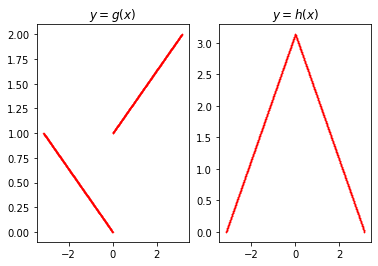

In [12]:
# You don't have to edit this cell. Just run it. (Unless you want to experiment)
%matplotlib inline

def g(x) :
    if x< 0 :
        return -x/np.pi
    else :
        return x/np.pi+1

def h(x) :
    return np.pi-abs(x)
    
gv = np.vectorize(g)
x = np.linspace(-np.pi,np.pi,1000)
y1 = gv(x)
y2 = h(x)

plt.subplot(121)
plt.plot(x,y1,'r.',markersize=1)
plt.title(r"$y=g(x)$")
plt.subplot(122)
plt.plot(x,y2,'r.',markersize=1)
plt.title(r"$y=h(x)$")
plt.show()

Next, let's see if your `Fpoly` function works. If it does, the cell below should plot the following:

- The graphs of $g$ and $h$ (red).
- The graphs of their periodic extensions (green, on $(-4\pi,4\pi)$).
- The graphs of their third degree Fourier polynomials (blue, on $(-4\pi,4\pi)$).
- The graphs of their fifteenth degree Fourier polynomials (black, on $(-4\pi,4\pi)$).

The graphs will open in a separate window.

In [13]:
# You don't have to edit this cell. Just run it. (Unless you want to experiment)
%matplotlib qt

x = np.linspace(-np.pi,np.pi,1000)
yg = gv(x)
yh = h(x)

xx = np.linspace(-4*np.pi,4*np.pi,10000)

yG = gv((xx+np.pi) % (2*np.pi) - np.pi)
yH = h((xx+np.pi) % (2*np.pi) - np.pi)
ygF3 = Fpoly(g,3,xx)
ygF15 = Fpoly(g,15,xx)
yhF3 = Fpoly(h,3,xx)
yhF15 = Fpoly(h,15,xx)

plt.subplot(211)
plt.plot(x,yg,'r.',label=r'$y=g(x)$')
plt.plot(xx,yG,'g.',label=r'$y=G(x)$',markersize=1)
plt.plot(xx,ygF3,'b',label=r'$y=T_{3}(x)$')
plt.plot(xx,ygF15,'k',label=r'$y=T_{15}(x)$')
plt.title(r"$g$, its extension and some of its Fourier polynomials")
plt.legend()
plt.subplot(212)
plt.plot(x,yh,'r.',label=r'$y=h(x)$')
plt.plot(xx,yH,'g.',label=r'$y=H(x)$',markersize=1)
plt.plot(xx,yhF3,'b',label=r'$y=T_{3}(x)$')
plt.plot(xx,yhF15,'k',label=r'$y=T_{15}(x)$')
plt.title(r"$h$, its extension and some of its Fourier polynomials")
plt.legend()
plt.show()

## To submit in LAMS

When you are somewhat confident that you got it right (you should be able to tell if the graphs make sense), you should submit:

- The code for your `Fpoly` function.
- The picture generated by the last cell. Maximise the graph window to get a clear picture.
- There are also three questions about what the Fourier polynomials for $g$ converge to at different points. The following theorem (which was mentioned earlier) gives you the answer ($g$ is piecewise smooth so the theorem applies) but you should probably also look at the graph to confirm the answer.

**Theorem**

Suppose that
- $f$ is piecewise smooth on $(-\pi,\pi)$.
- $F$ is the periodic extension with period $2\pi$ of $f$.
Then, at each point $x\in\mathbb{R}$, the value $T_n(x)$ of the Fourier polynomials for $f$, converges as $n\to\infty$ to the mean value
$$\frac{F(x+)+F(x-)}{2}$$
of the one-sided limits $F(x+)$ and $F(x-)$